In [2]:
import pandas as pd
import numpy as np
import geopandas
import seaborn as sns
%matplotlib inline

## Generating Baseline Trips dataset

### Shuffling destinations to create baseline OD Matrix

In [3]:
bus_trips_zones = pd.read_csv('/local/tarciso/data/pesquisa-od-ctba/od-matrices/bus_trips_zones.csv')

In [4]:
bus_trips_zones.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
0,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
1,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
2,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
3,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
4,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00


In [5]:
dest_cols = bus_trips_zones.filter(['zona_d','cod_macrozona_d','municipio_d'])

In [6]:
dest_cols

,zona_d,cod_macrozona_d,municipio_d
0,301,1.0,CURITIBA
1,302,1.0,CURITIBA
2,451,1.0,CURITIBA
3,303,1.0,CURITIBA
4,495,3.0,CURITIBA
5,781,5.0,CURITIBA
6,631,5.0,CURITIBA
7,301,1.0,CURITIBA
8,927,9.0,CURITIBA
9,1023,8.0,CURITIBA


In [7]:
other_cols = bus_trips_zones.drop(dest_cols.columns, axis=1)

In [8]:
other_cols.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,mot_d,hora_d
0,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,Assuntos pessoais,14:20
1,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,Escola/educacao,18:50
2,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,Residencia,23:00
3,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,Compras,13:00
4,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,Residencia,18:00


In [9]:
np.random.seed(199)

In [10]:
shuffled_dests = dest_cols.reindex(np.random.permutation(dest_cols.index))

In [11]:
shuffled_dests

,zona_d,cod_macrozona_d,municipio_d
7380,301,1.0,CURITIBA
7862,302,1.0,CURITIBA
2733,451,1.0,CURITIBA
2255,303,1.0,CURITIBA
6019,495,3.0,CURITIBA
9967,781,5.0,CURITIBA
7386,631,5.0,CURITIBA
8521,301,1.0,CURITIBA
5361,927,9.0,CURITIBA
7520,1023,8.0,CURITIBA


In [12]:
shuffled_trips_dests = pd.concat([other_cols.reset_index(drop=True), 
                                  shuffled_dests.reset_index(drop=True)], axis=1) \
                        .filter(bus_trips_zones.columns)

### Checking if destination shuffling was performed correctly

In [13]:
shuffled_trips_dests.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
0,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
1,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
2,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
3,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
4,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00


In [14]:
bus_trips_zones.head()

,pessoa,sexo,idade,cod_transp,transp,zona_o,cod_macrozona_o,municipio_o,mot_o,hora_o,zona_d,cod_macrozona_d,municipio_d,mot_d,hora_d
0,3,Feminino,62.0,3,Onibus metropolitano,111,NaN,ARAUCÁRIA,Residencia,13:30,301,1.0,CURITIBA,Assuntos pessoais,14:20
1,6,Masculino,22.0,1,Onibus municipio de Curitiba,451,1.0,CURITIBA,Residencia,18:00,302,1.0,CURITIBA,Escola/educacao,18:50
2,6,Masculino,22.0,1,Onibus municipio de Curitiba,302,1.0,CURITIBA,Escola/educacao,22:30,451,1.0,CURITIBA,Residencia,23:00
3,15,Feminino,24.0,1,Onibus municipio de Curitiba,495,3.0,CURITIBA,Residencia,12:30,303,1.0,CURITIBA,Compras,13:00
4,15,Feminino,24.0,1,Onibus municipio de Curitiba,303,1.0,CURITIBA,Compras,17:20,495,3.0,CURITIBA,Residencia,18:00


In [15]:
pd.concat([shuffled_trips_dests.filter(dest_cols.columns),
           bus_trips_zones.filter(dest_cols.columns)]) \
    .drop_duplicates(keep=False)

,zona_d,cod_macrozona_d,municipio_d


## Generating Baseline OD Matrix for Macrozones

In [16]:
baseline_macrozones_trips = shuffled_trips_dests.groupby(['cod_macrozona_o','cod_macrozona_d']).pessoa.count().reset_index(name='num_pass')

In [17]:
baseline_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,701
1,1.0,2.0,289
2,1.0,3.0,351
3,1.0,4.0,363
4,1.0,5.0,600
5,1.0,6.0,213
6,1.0,7.0,251
7,1.0,8.0,263
8,1.0,9.0,136
9,1.0,10.0,62


In [18]:
baseline_macrozones_freqs = baseline_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass').fillna(0)

In [19]:
baseline_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,701,289,351,363,600,213,251,263,136,62
2.0,291,120,40,58,63,61,107,139,67,32
3.0,352,42,141,32,45,50,14,29,15,7
4.0,361,57,33,282,44,22,28,88,20,5
5.0,590,66,49,48,328,32,21,19,10,5
6.0,219,64,52,22,37,258,59,43,68,8
7.0,260,111,13,28,23,56,138,70,55,44
8.0,264,140,31,84,25,44,67,285,28,37
9.0,143,68,14,22,18,69,49,25,71,10


In [20]:
baseline_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/baseline_macrozones_freqs.csv')

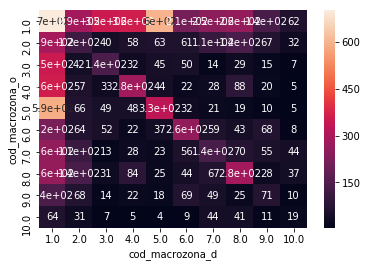

In [21]:
sns.heatmap(baseline_macrozones_freqs, annot=True)

In [22]:
baseline_macrozones_norm_freqs = baseline_macrozones_freqs/baseline_macrozones_freqs.values.sum()

In [23]:
baseline_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.067410,0.027791,0.033753,0.034907,0.057698,0.020483,0.024137,0.025291,0.013078,0.005962
2.0,0.027983,0.011540,0.003847,0.005577,0.006058,0.005866,0.010289,0.013367,0.006443,0.003077
3.0,0.033849,0.004039,0.013559,0.003077,0.004327,0.004808,0.001346,0.002789,0.001442,0.000673
4.0,0.034715,0.005481,0.003173,0.027118,0.004231,0.002116,0.002693,0.008462,0.001923,0.000481
5.0,0.056736,0.006347,0.004712,0.004616,0.031541,0.003077,0.002019,0.001827,0.000962,0.000481
6.0,0.021060,0.006154,0.005000,0.002116,0.003558,0.024810,0.005674,0.004135,0.006539,0.000769
7.0,0.025002,0.010674,0.001250,0.002693,0.002212,0.005385,0.013271,0.006731,0.005289,0.004231
8.0,0.025387,0.013463,0.002981,0.008078,0.002404,0.004231,0.006443,0.027406,0.002693,0.003558
9.0,0.013751,0.006539,0.001346,0.002116,0.001731,0.006635,0.004712,0.002404,0.006828,0.000962


In [24]:
baseline_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/baseline_macrozones_norm_freqs.csv')

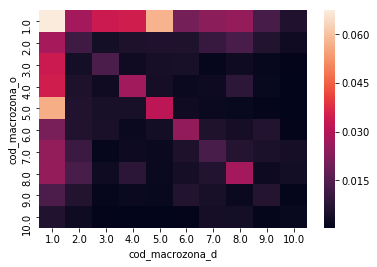

In [25]:
sns.heatmap(baseline_macrozones_norm_freqs)

## Generating Baseline OD Matrix for Zones

In [26]:
baseline_zones_trips = shuffled_trips_dests.groupby(['zona_o','zona_d']).pessoa.count().reset_index(name='num_pass')

In [27]:
baseline_zones_trips

,zona_o,zona_d,num_pass
0,101,101,3
1,101,102,1
2,101,103,2
3,101,104,3
4,101,301,1
5,101,302,1
6,101,303,1
7,101,321,2
8,101,341,1
9,101,362,1


In [28]:
baseline_zones_freqs = baseline_zones_trips.pivot(index='zona_o',columns='zona_d',values='num_pass').fillna(0)

In [29]:
baseline_zones_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,3.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103,2.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
104,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,7.0,1.0,13.0,1.0,0.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,10.0,3.0,11.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
121,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [30]:
baseline_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/baseline_zones_freqs.csv')

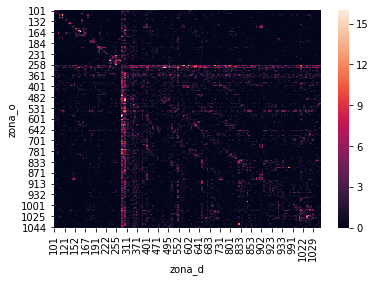

In [31]:
sns.heatmap(baseline_zones_freqs)

In [32]:
baseline_zones_norm_freqs = baseline_zones_freqs/baseline_zones_freqs.values.sum()

In [33]:
baseline_zones_norm_freqs

zona_d,101,102,103,104,111,112,113,121,131,132,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
zona_o,,,,,,,,,,,,,,,,,,,,,
101,0.000225,0.000075,0.000150,0.000225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000
102,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
103,0.000150,0.000000,0.000075,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000
104,0.000225,0.000000,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
111,0.000000,0.000000,0.000000,0.000000,0.000525,0.000075,0.000974,0.000075,0.000000,0.000000,...,0.000075,0.000150,0.000150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000150,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
113,0.000000,0.000000,0.000000,0.000000,0.000749,0.000225,0.000824,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
121,0.000000,0.000000,0.000000,0.000000,0.000075,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000300,0.000225,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000075


In [34]:
baseline_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/baseline_zones_norm_freqs.csv')

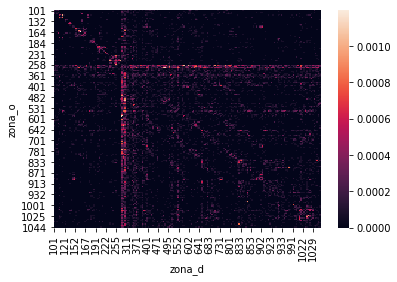

In [35]:
sns.heatmap(baseline_zones_norm_freqs)